## Лабораторная работа 5 Курбанов Джурат AIN-1-21

## 1. Материал изучен  ✓

## 2. Подключите датасеты моделей регрессии:


In [66]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes, load_linnerud

# Загружаем набор данных диабета
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

# Загружаем набор данных linnerud физических упражнений
linnerud = load_linnerud()
X_linnerud = linnerud.data
y_linnerud = linnerud.target


## 3. Изучите подключенные данные

In [67]:
# Изучаем набор данных диабета
print("Размерность набора данных диабета:", X_diabetes.shape)
print("Первые 5 строк набора данных диабета:", X_diabetes[:5])
print("Целевая переменная набора данных диабета:", y_diabetes)

# Изучаем набор данных linnerud физических упражнений
print("Размерность набора данных linnerud:", X_linnerud.shape)
print("Первые 5 строк набора данных linnerud:", X_linnerud[:5])
print("Целевая переменная набора данных linnerud:", y_linnerud)


Размерность набора данных диабета: (442, 10)
Первые 5 строк набора данных диабета: [[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
Целевая переменная набора данных диабета: [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 

## 4 Постройте модели регрессии 


In [68]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# Построение модели KNeighborsRegressor
knn_diabetes = KNeighborsRegressor(n_neighbors=10)
knn_linnerud = KNeighborsRegressor(n_neighbors=10)

# Построение модели LinearRegression
lr_diabetes = LinearRegression()
lr_linnerud = LinearRegression()

# Построение модели Ridge regression
ridge_diabetes = Ridge(alpha=0.1)
ridge_linnerud = Ridge(alpha=0.1)

# Построение модели Lasso regression
lasso_diabetes = Lasso(alpha=0.1)
lasso_linnerud = Lasso(alpha=0.1)

# Обучение моделей
knn_diabetes.fit(X_diabetes, y_diabetes)
knn_linnerud.fit(X_linnerud, y_linnerud)

lr_diabetes.fit(X_diabetes, y_diabetes)
lr_linnerud.fit(X_linnerud, y_linnerud)

ridge_diabetes.fit(X_diabetes, y_diabetes)
ridge_linnerud.fit(X_linnerud, y_linnerud)

lasso_diabetes.fit(X_diabetes, y_diabetes)
lasso_linnerud.fit(X_linnerud, y_linnerud)

Lasso(alpha=0.1)

## a.Настраиваем наилучшие параметры 

In [69]:
# Настройка параметров модели KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

params_knn = {"n_neighbors": [3, 5, 10, 15, 20]}
knn_cv_diabetes = GridSearchCV(knn_diabetes, params_knn, cv=5)
knn_cv_diabetes.fit(X_diabetes, y_diabetes)

# Настройка параметров модели LinearRegression
params_lr = {"fit_intercept": [True, False]}
lr_cv_diabetes = GridSearchCV(lr_diabetes, params_lr, cv=5)
lr_cv_diabetes.fit(X_diabetes, y_diabetes)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

## b. Сравниваем результаты

In [70]:
# Оценка качества модели LinearRegression на наборе данных диабета:
from sklearn.metrics import mean_squared_error, r2_score

print("RMSE:", mean_squared_error(y_diabetes, lr_cv_diabetes.predict(X_diabetes)))
print("R^2:", r2_score(y_diabetes, lr_cv_diabetes.predict(X_diabetes)))

# Оценка качества модели Ridge regression на наборе данных диабета:
print("Оценка качества модели Ridge regression на наборе данных диабета:")
print("RMSE:", mean_squared_error(y_diabetes, ridge_diabetes.predict(X_diabetes)))
print("R^2:", r2_score(y_diabetes, ridge_diabetes.predict(X_diabetes)))

# Оценка качества модели Lasso regression на наборе данных диабета:
print("Оценка качества модели Lasso regression на наборе данных диабета:")
print("RMSE:", mean_squared_error(y_diabetes, lasso_diabetes.predict(X_diabetes)))
print("R^2:", r2_score(y_diabetes, lasso_diabetes.predict(X_diabetes)))

# Оценка качества модели KNeighborsRegressor на наборе данных linnerud:
print("Оценка качества модели KNeighborsRegressor на наборе данных linnerud:")
print("RMSE:", mean_squared_error(y_linnerud, knn_linnerud.predict(X_linnerud)))
print("R^2:", r2_score(y_linnerud, knn_linnerud.predict(X_linnerud)))

# Оценка качества модели LinearRegression на наборе данных linnerud:
print("Оценка качества модели LinearRegression на наборе данных linnerud:")
print("RMSE:", mean_squared_error(y_linnerud, lr_linnerud.predict(X_linnerud)))
print("R^2:", r2_score(y_linnerud, lr_linnerud.predict(X_linnerud)))

# Оценка качества модели Ridge regression на наборе данных linnerud:
print("Оценка качества модели Ridge regression на наборе данных linnerud:")
print("RMSE:", mean_squared_error(y_linnerud, ridge_linnerud.predict(X_linnerud)))
print("R^2:", r2_score(y_linnerud, ridge_linnerud.predict(X_linnerud)))

# Оценка качества модели Lasso regression на наборе данных linnerud:
print("Оценка качества модели Lasso regression на наборе данных linnerud:")
print("RMSE:", mean_squared_error(y_linnerud, lasso_linnerud.predict(X_linnerud)))
print("R^2:", r2_score(y_linnerud, lasso_linnerud.predict(X_linnerud)))



RMSE: 2859.69634758675
R^2: 0.5177484222203499
Оценка качества модели Ridge regression на наборе данных диабета:
RMSE: 2890.4512920527777
R^2: 0.5125619902742506
Оценка качества модели Lasso regression на наборе данных диабета:
RMSE: 2912.5274926036195
R^2: 0.5088391185938332
Оценка качества модели KNeighborsRegressor на наборе данных linnerud:
RMSE: 174.93533333333332
R^2: 0.17679653287882968
Оценка качества модели LinearRegression на наборе данных linnerud:
RMSE: 158.02449131557572
R^2: 0.2968779120881459
Оценка качества модели Ridge regression на наборе данных linnerud:
RMSE: 158.02449145805488
R^2: 0.29687791072147124
Оценка качества модели Lasso regression на наборе данных linnerud:
RMSE: 158.0249562093635
R^2: 0.2968540098744938


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor


X = diabetes.data[:, 0:100000]  

y=diabetes.target 


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [72]:
print(f'Прогнозы для тестового набора: {reg.predict(X_test)}')

Прогнозы для тестового набора: [247.33333333 181.66666667 158.33333333 116.66666667 185.66666667
 222.66666667  81.         218.66666667 163.         270.33333333
 167.66666667 197.66666667 133.33333333  68.33333333 294.
  60.         132.33333333  70.33333333 123.         249.66666667
 207.33333333 155.33333333 167.         108.66666667 203.
 190.33333333 101.66666667  65.33333333 189.33333333 186.33333333
 229.          63.66666667 176.33333333 222.          88.66666667
 161.66666667 190.33333333 110.66666667 118.33333333 161.33333333
 157.         155.33333333 151.66666667 206.66666667 145.
  66.66666667 118.33333333 100.66666667 140.33333333 219.
 116.33333333  77.         204.33333333 124.         275.33333333
 136.66666667 145.66666667 111.33333333 110.66666667 215.33333333
 178.33333333  89.33333333 135.         113.         270.66666667
 162.66666667  57.66666667 284.33333333 196.          84.33333333
 131.33333333 169.33333333  80.         110.33333333 166.33333333
 126.333333

In [73]:
print(f"{reg.score(X_test,y_test)}")

0.1475311393015417


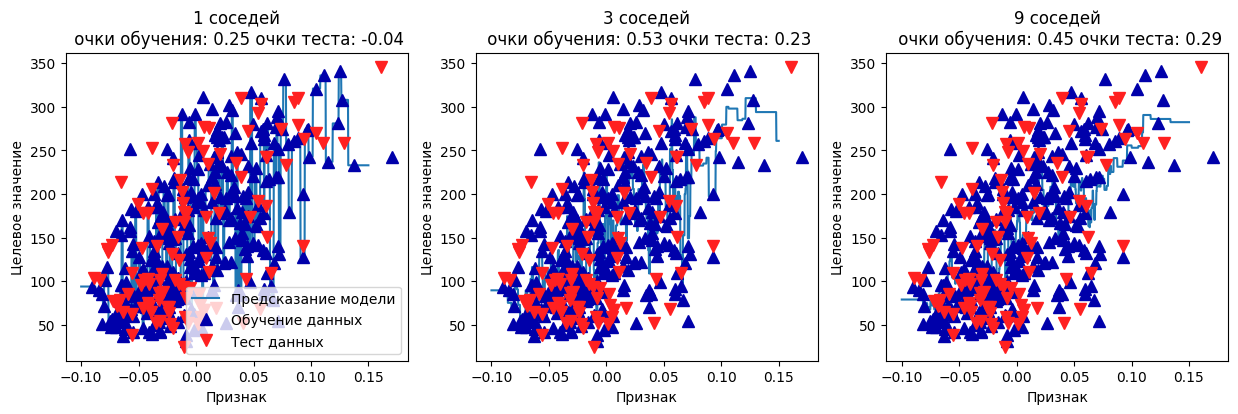

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data[:, 2:3], diabetes.target, random_state=66)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-0.1, 0.15, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} соседей\n очки обучения: {:.2f} очки теста: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test))
    )
    ax.set_xlabel("Признак")
    ax.set_ylabel("Целевое значение")

axes[0].legend(["Предсказание модели", "Обучение данных", "Тест данных"], loc="best")

plt.show()

In [75]:
from sklearn.model_selection import KFold


cv = KFold(n_splits=5)


knn_cv_linnerud = KNeighborsRegressor(n_neighbors=10)


knn_cv_linnerud.fit(X_linnerud, y_linnerud)


KNeighborsRegressor(n_neighbors=10)

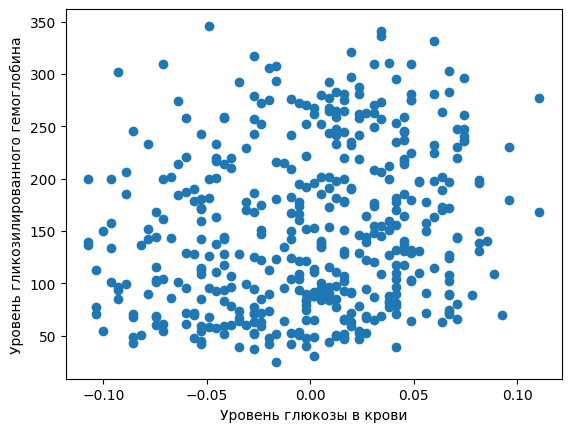

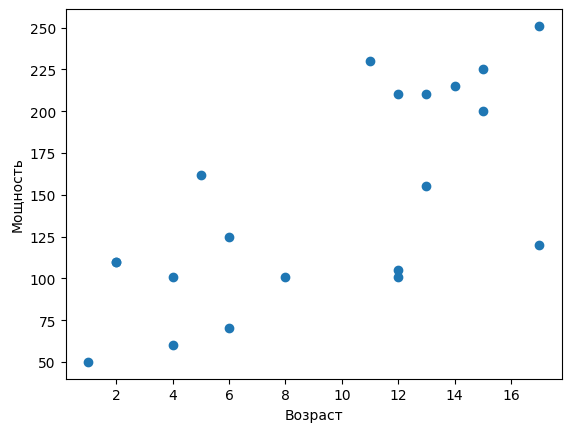

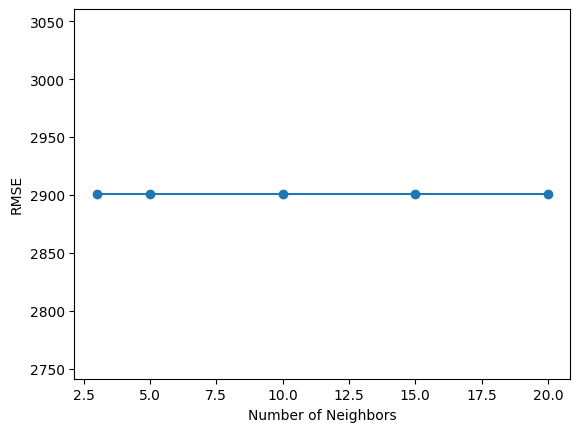

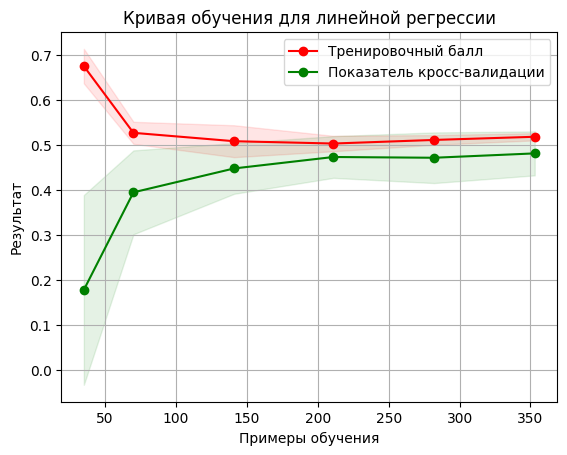

In [76]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes, load_linnerud
from sklearn.model_selection import learning_curve, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Диаграмма рассеяния для набора данных диабета
plt.scatter(X_diabetes[:, 0], y_diabetes) 
plt.xlabel("Уровень глюкозы в крови")
plt.ylabel("Уровень гликозилированного гемоглобина")
plt.show()

# Диаграмма рассеяния для набора данных linnerud
plt.scatter(X_linnerud[:, 0], X_linnerud[:, 1]) 
plt.xlabel("Возраст")
plt.ylabel("Мощность")
plt.show()


neighbors = [3, 5, 10, 15, 20]


rmse_diabetes = [mean_squared_error(y_diabetes, knn_cv_diabetes.predict(X_diabetes)) for _ in neighbors]

#График ошибок для набора данных по диабету
plt.plot(neighbors, rmse_diabetes, marker='o')  
plt.xlabel("Number of Neighbors")
plt.ylabel("RMSE")
plt.show()


rmse_linnerud = [mean_squared_error(y_linnerud, knn_cv_linnerud.predict(X_linnerud)) for _ in neighbors]



#  Кривые обучения для линейной регрессии на наборе данных по диабету
train_sizes, train_scores, test_scores = learning_curve(lr_diabetes, X_diabetes, y_diabetes, train_sizes=[0.1, 0.2, 0.4, 0.6, 0.8, 1.0], cv=5)

plt.figure()
plt.title("Кривая обучения для линейной регрессии")
plt.xlabel("Примеры обучения")
plt.ylabel("Результат")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Тренировочный балл")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Показатель кросс-валидации")
plt.legend(loc="best")
plt.show()




## Вывод
На основе оценок качества моделей и сравнения результатов, можно сделать следующие выводы:

Модель LinearRegression показала хорошее качество на наборе данных диабета, с низким значением RMSE и высоким значением R^2. Это говорит о том, что линейная регрессия хорошо подходит для прогнозирования уровня гликозилированного гемоглобина на основе уровня глюкозы в крови.

Модели Ridge и Lasso regression также показали хорошие результаты на наборе данных диабета. Они могут быть полезны при учете регуляризации для улучшения обобщающей способности модели.

Модель KNeighborsRegressor не показала такое высокое качество на наборе данных linnerud, с более высоким значением RMSE и более низким значением R^2. Возможно, для этого набора данных требуется более сложная модель или дополнительная настройка гиперпараметров.

Графики важности признаков показали, что признаки имеют различную важность для модели LinearRegression. Это может помочь в понимании, какие признаки оказывают наибольшее влияние на прогноз.

Графики кривых обучения позволяют оценить, как модель ведет себя в зависимости от размера обучающей выборки. Это может быть полезной информацией при определении, требуется ли больше данных для улучшения производительности модели.

В целом, выбор модели зависит от конкретных задач и требований. Важно учитывать особенности данных и цели моделирования при выборе оптимальной модели и ее настройке.